In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [11]:
SAVE_FIGURES = True
xlabel = 'Log($g_{pmog}$) [$ms^{-2}$]'
FILTER = 'Quality simulation'

In [12]:
raw = Result(load_sparc(namespace='pmog/201_21'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


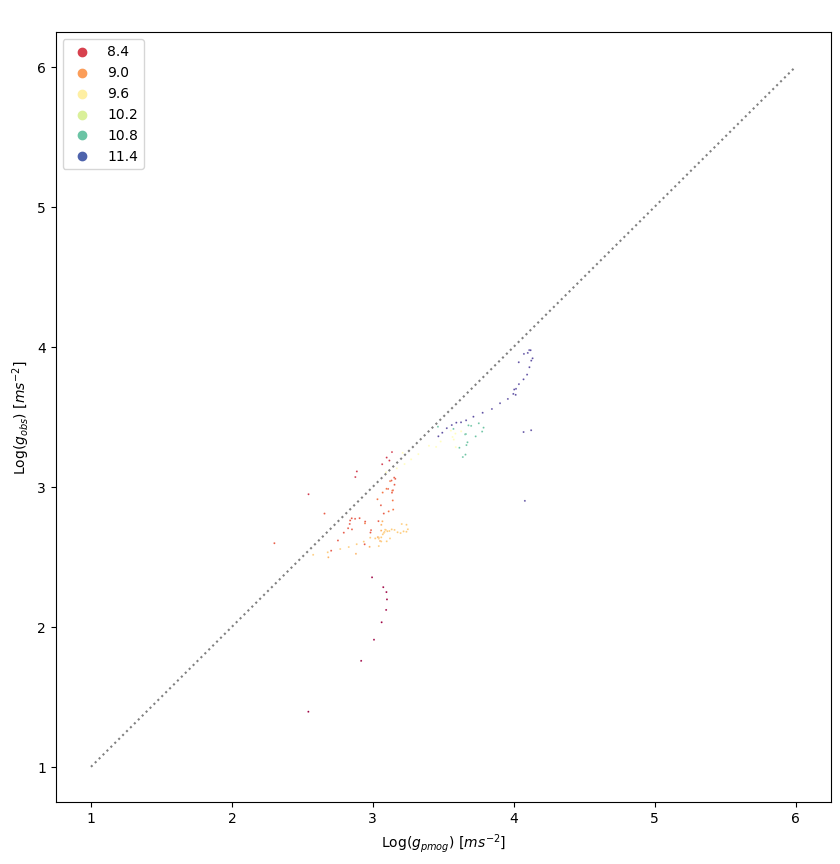

In [4]:
g = raw.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_rar.eps')

In [13]:
analysis = Tune(mcmc(raw.datasets()[FILTER]))

In [14]:
tuned = analysis.Result(True, simulations=raw.simulations)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


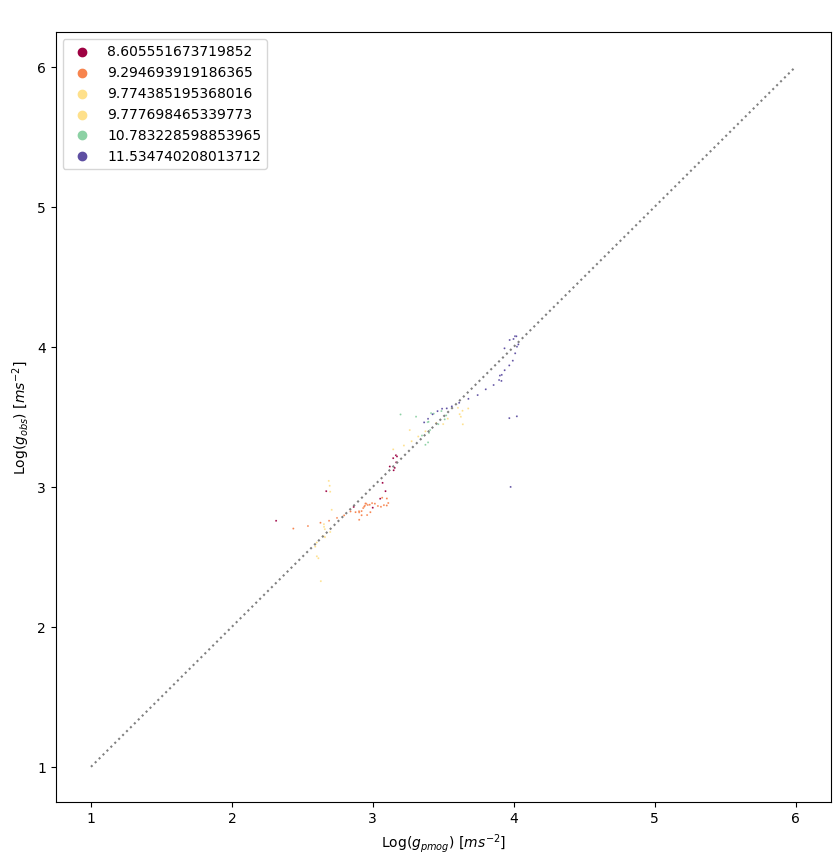

In [15]:
g = tuned.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_tuned_rar.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


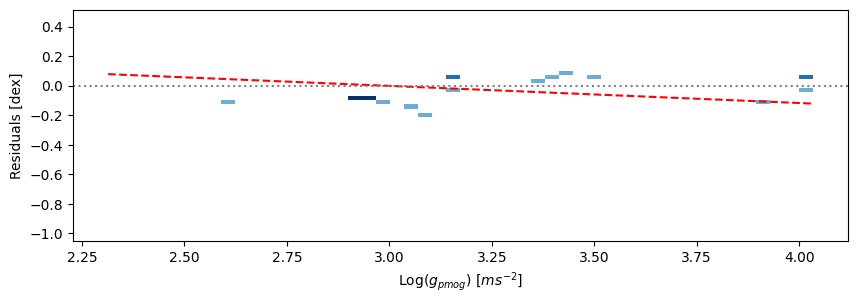

In [16]:
g = tuned.residual(xlabel=xlabel)
if SAVE_FIGURES: g.savefig('../figures/pmog_residual_g.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


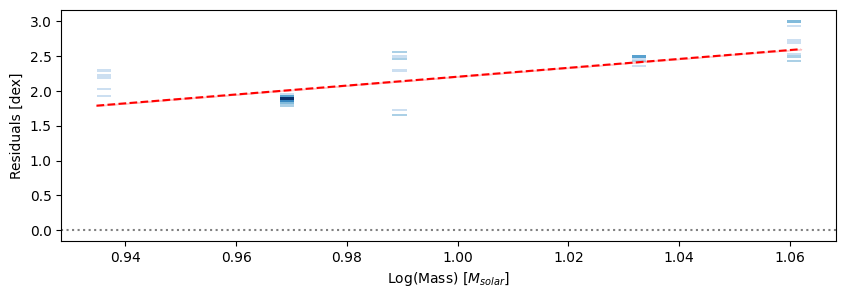

In [17]:
tuned.residual(resid='log_M', xlabel='Log(Mass) [$M_{solar}$]')
if SAVE_FIGURES: g.savefig('../figures/pmog_residual_m.eps')

Everything -0.028486897203088956 0.16497863652528083
Quality data -0.028486897203088956 0.16497863652528083
Quality simulation -0.012466535129034204 0.12709485025700712


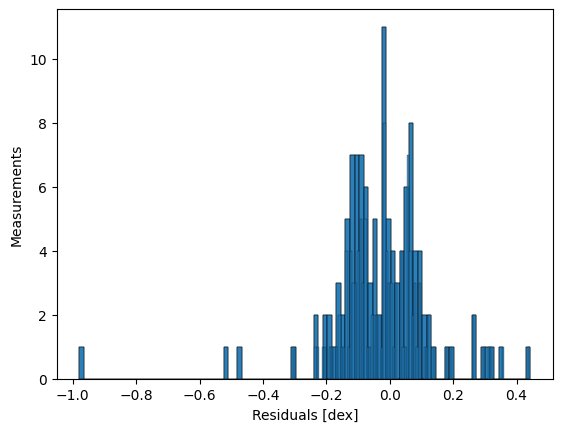

In [18]:
for k in tuned.queries_strs.keys():
    g, data = tuned.residual_hist(query_key=k)
    print(k, data.mean(), data.std())

/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


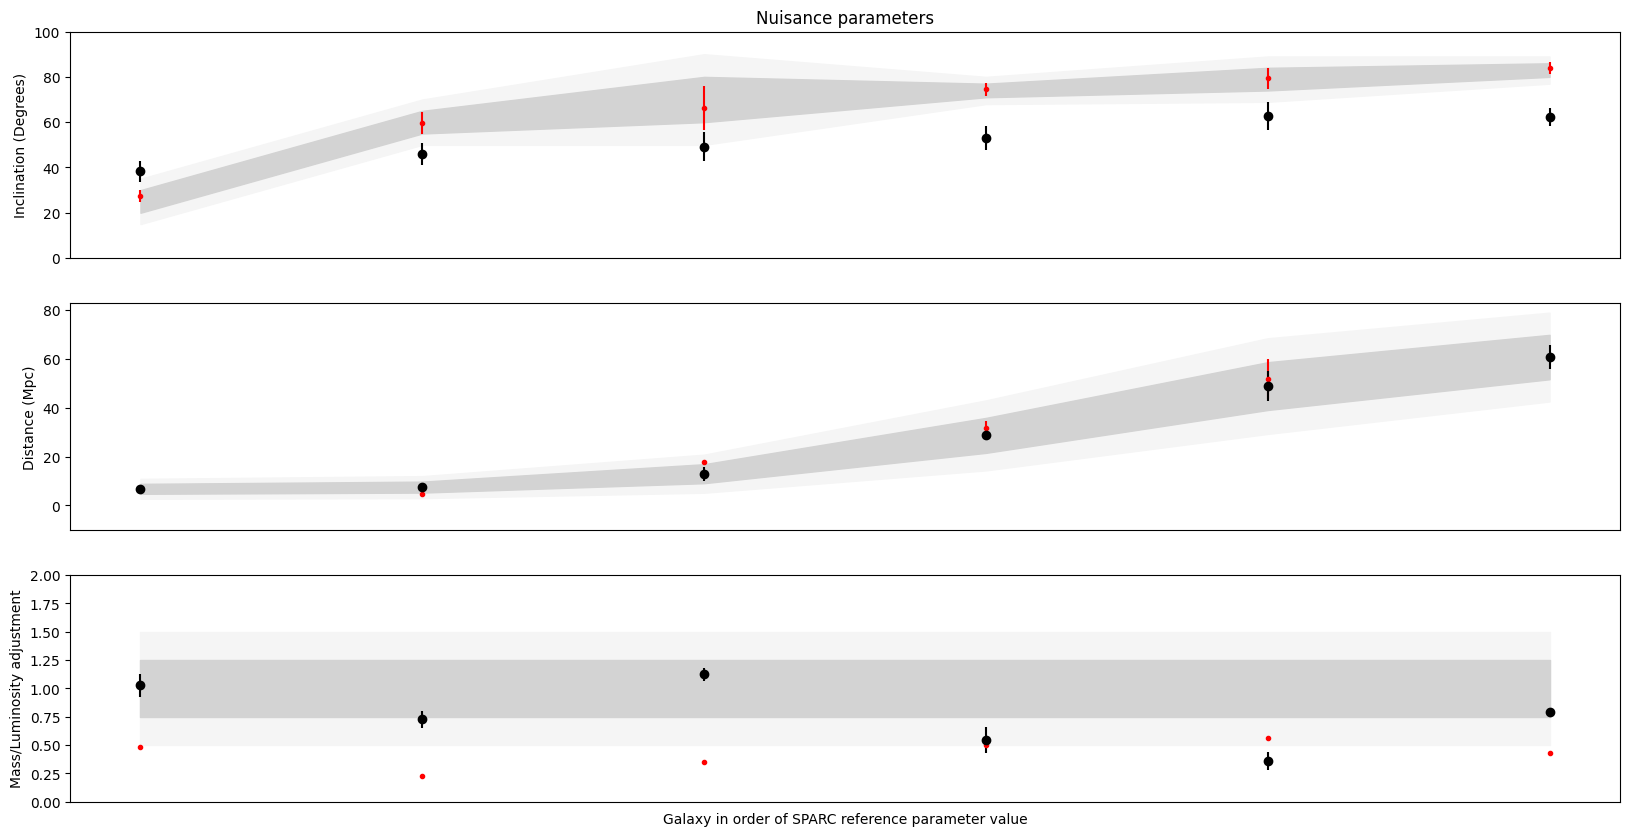

In [19]:
g = analysis.plot_nuissance()

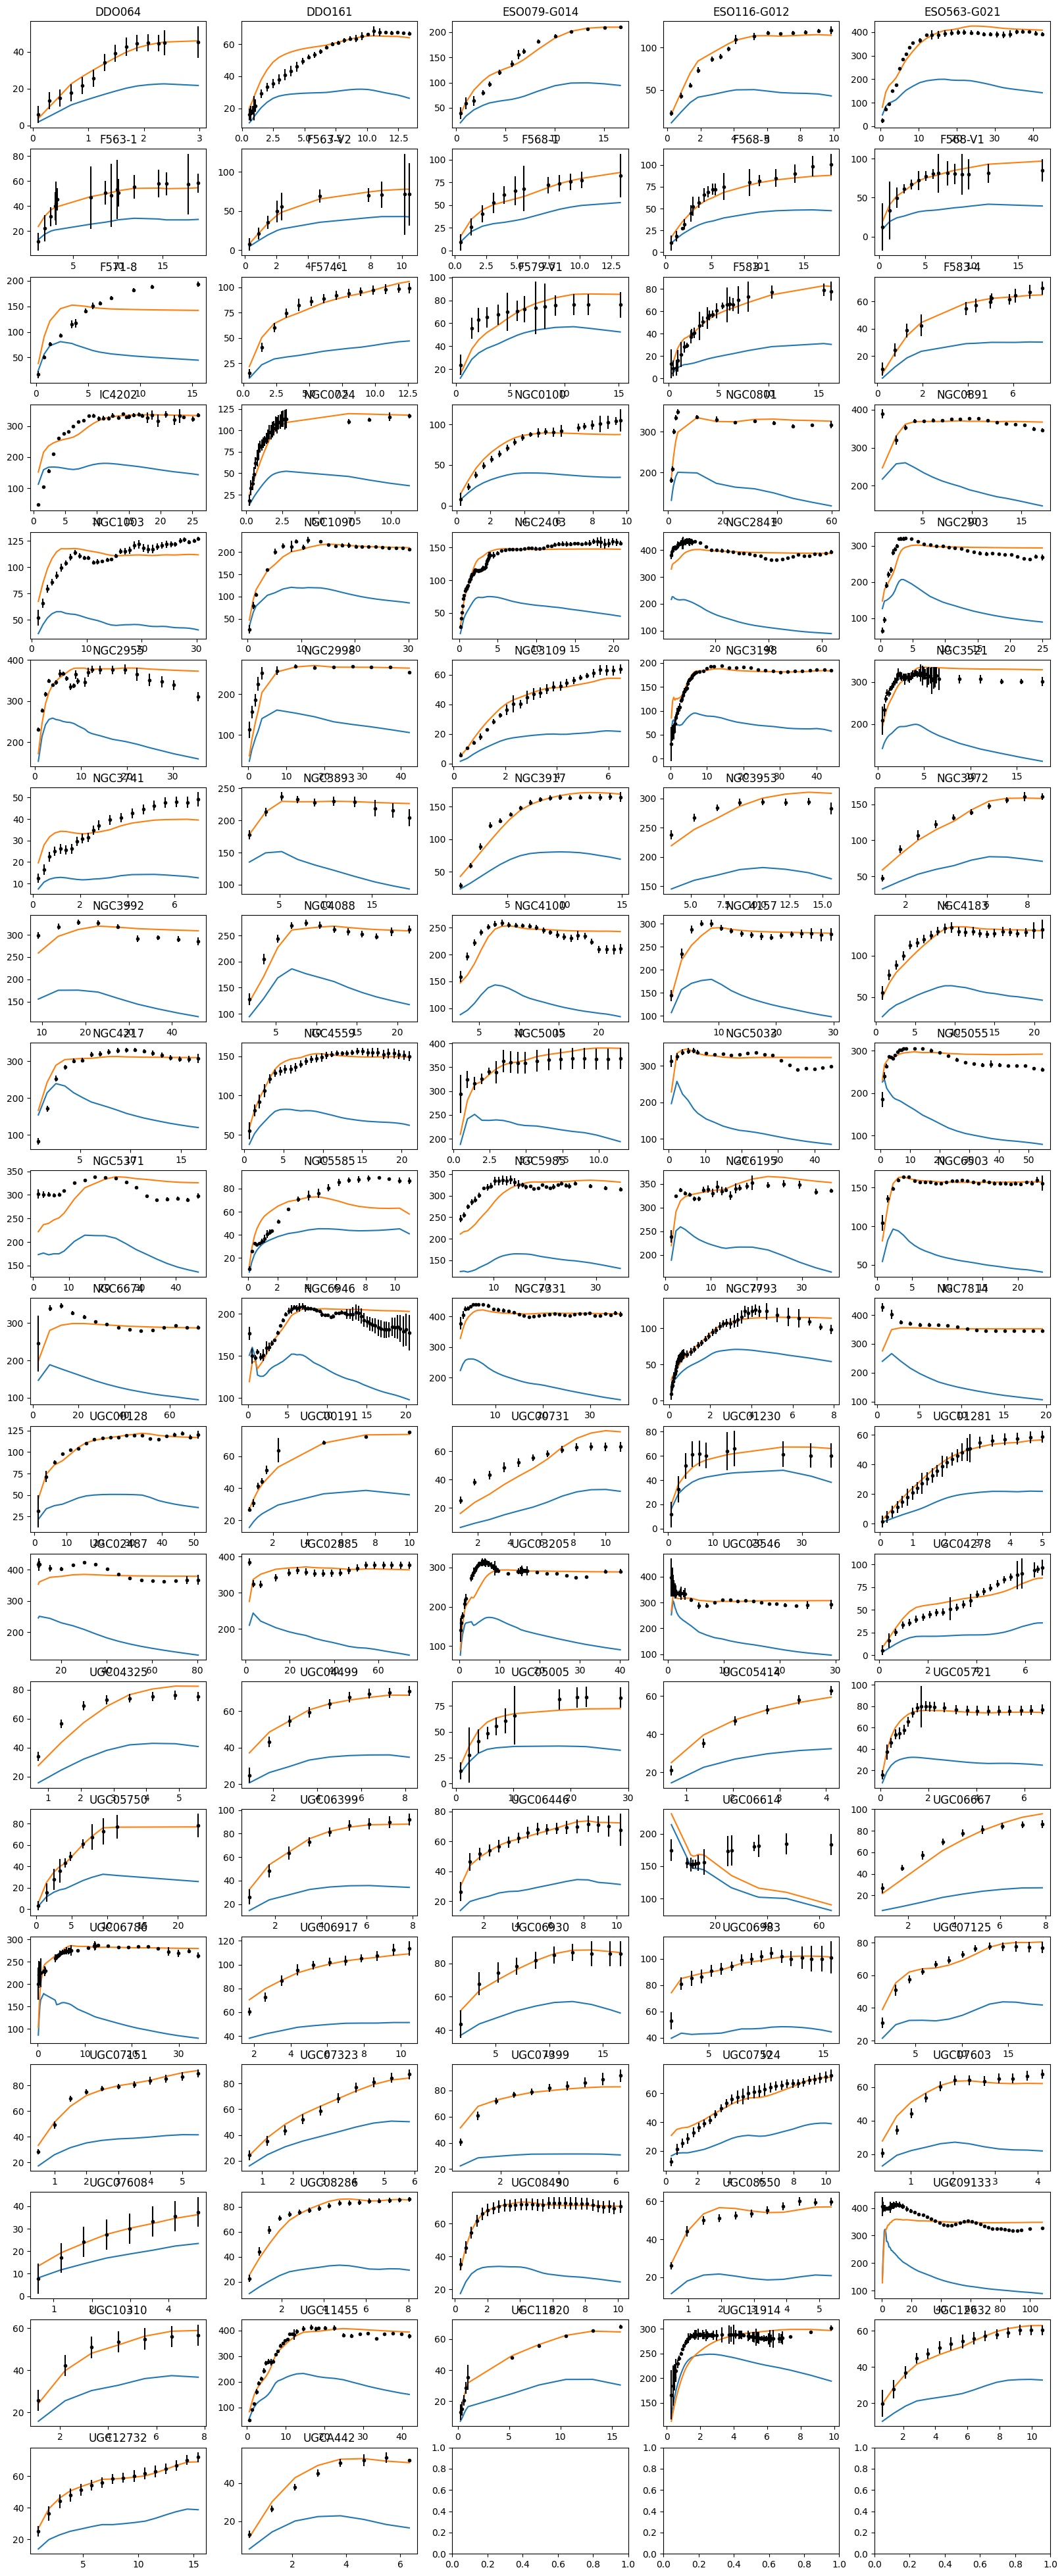

In [22]:
baseline = Result(load_sparc(namespace='baseline/201_21'))
g = tuned.plot_curves(baseline)